In [36]:
#Mini-Projeto: Análise de Gorjetas
##Objetivo

###Entender quem dá mais gorjeta (sexo, fumante, hora da refeição)

###Explorar distribuição de gorjetas e valores da conta

###Identificar padrões para possíveis insights

####Importar bibliotecas e carregar dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
# Limpeza e preparação de dados

# Verificar nulos
print(df.isnull().sum())

# Transformar categorias em números (opcional para análise)
df['sex_num'] = df['sex'].map({'Male':1, 'Female':0})
df['smoker_num'] = df['smoker'].map({'Yes':1, 'No':0})
df['time_num'] = df['time'].map({'Lunch':0, 'Dinner':1})
df['day_num'] = df['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [38]:
# Estatísticas básicas
print("Resumo Estatístico:\n", df.describe())
print("\nMédia de Gorjeta por Dia:\n", df.groupby('day')['tip'].mean())



Resumo Estatístico:
        total_bill         tip        size     sex_num  smoker_num    time_num  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean    19.785943    2.998279    2.569672    0.643443    0.381148    0.721311   
std      8.902412    1.383638    0.951100    0.479967    0.486667    0.449276   
min      3.070000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%     13.347500    2.000000    2.000000    0.000000    0.000000    0.000000   
50%     17.795000    2.900000    2.000000    1.000000    0.000000    1.000000   
75%     24.127500    3.562500    3.000000    1.000000    1.000000    1.000000   
max     50.810000   10.000000    6.000000    1.000000    1.000000    1.000000   

          day_num  
count  244.000000  
mean     1.725410  
std      1.155774  
min      0.000000  
25%      0.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  

Média de Gorjeta por Dia:
 day
Fri     2.734737
Sat     2.993103
Sun

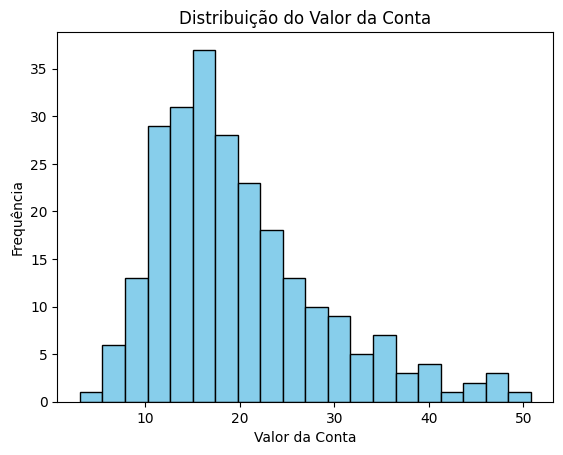

In [40]:
#Visualizações
##Histograma do valor da conta
plt.hist(df['total_bill'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição do Valor da Conta")
plt.xlabel("Valor da Conta")
plt.ylabel("Frequência")
plt.show()

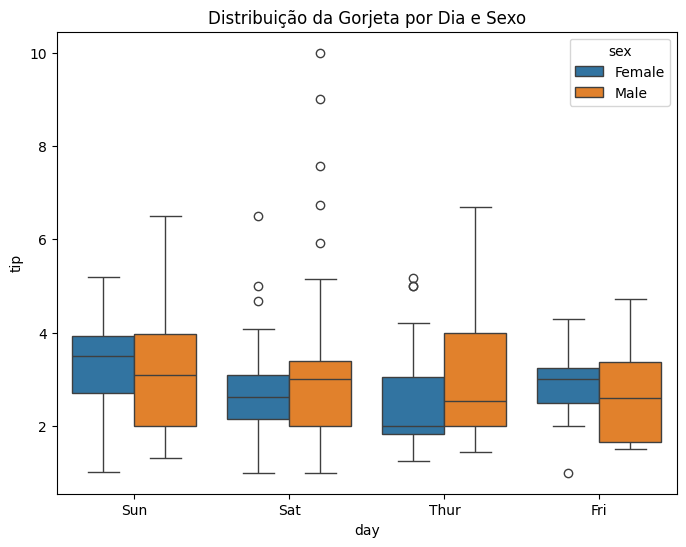

In [41]:
# Boxplot da gorjeta por dia e sexo
plt.figure(figsize=(8,6))
sns.boxplot(x='day', y='tip', data=df, hue='sex')
plt.title("Distribuição da Gorjeta por Dia e Sexo")
plt.show()

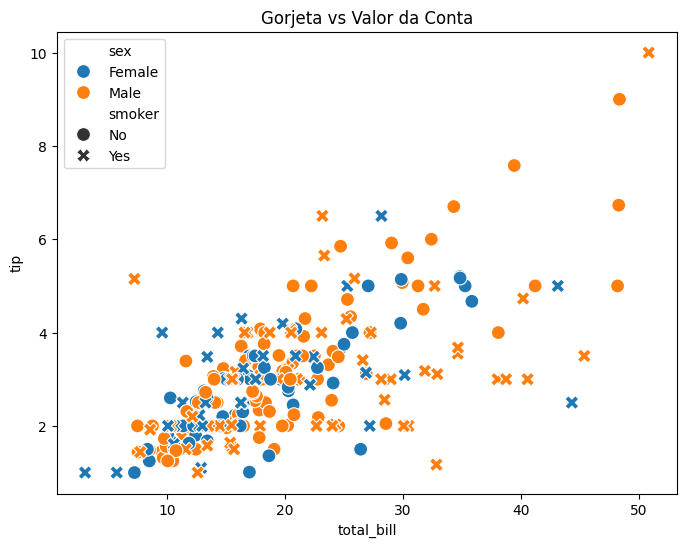

In [42]:
# Scatterplot gorjeta vs valor da conta
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', style='smoker', s=100)
plt.title("Gorjeta vs Valor da Conta")
plt.show()

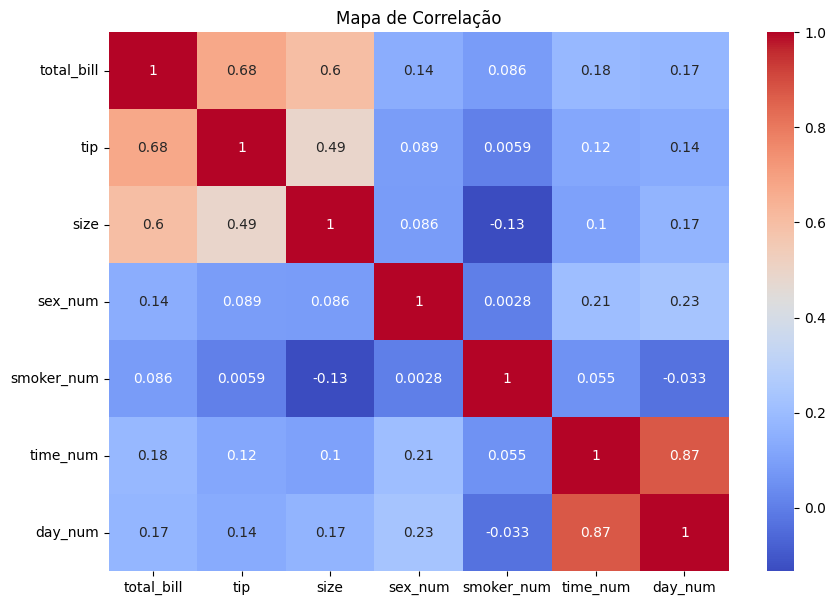

In [43]:
# Correlação (numéricas + categorias transformadas)
all_numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,7))
sns.heatmap(all_numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Correlação")
plt.show()

In [45]:
#Mini-Projeto Avançado — Prevendo Gorjetas
##Importar bibliotecas para modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
#Preparar os dados

#Vamos usar apenas colunas numéricas:

# Seleciona as colunas numéricas como features
X = df[['total_bill', 'sex_num', 'smoker_num', 'day_num', 'time_num', 'size']]  

# Target (o que queremos prever)
y = df['tip']


In [47]:
#Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
#Fazer previsões
y_pred = model.predict(X_test)

In [50]:
#Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.70
R² Score: 0.44


In [51]:
#Ver os coeficientes do modelo
coefficients = pd.DataFrame({'Feature': X.columns, 'Coeficiente': model.coef_})
print(coefficients)

      Feature  Coeficiente
0  total_bill     0.094440
1     sex_num     0.024569
2  smoker_num    -0.181175
3     day_num     0.063802
4    time_num    -0.193064
5        size     0.231949
